# Importando base de dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado', 
    'Thur' : 'Quinta', 
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner' : 'Jantar', 
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# Importando o Seaborn

In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, numpy, matplotlib, scipy
Required-by: missingno


# Análise 1 - Valor da conta e gorjeta

In [ ]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

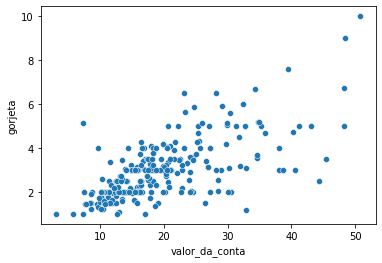

In [ ]:
# o valor da gorjeta aumenta com o valor da conta?
valor_da_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
# visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [ ]:
print('A base de dados contém {} registros'.format(gorjetas.shape[0]))
print('Registros não nulos')
# count conta os valores nulos
gorjetas.count()

A base de dados contém 244 registros
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


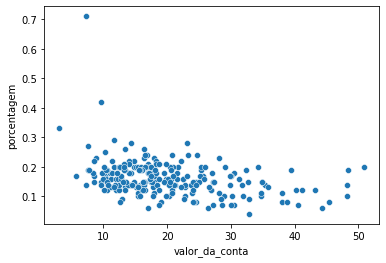

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)
# visualmente o valor da conta não é proporcional ao valor da gorjeta

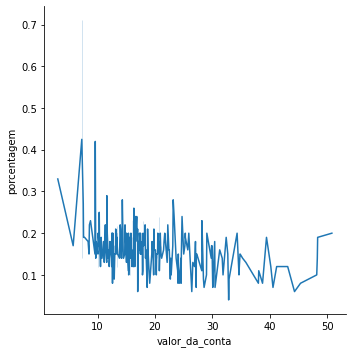

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

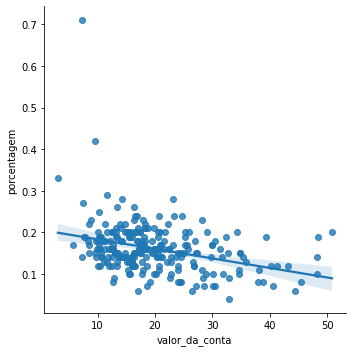

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


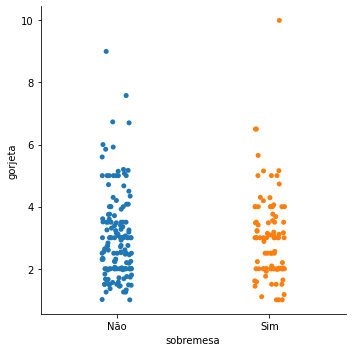

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

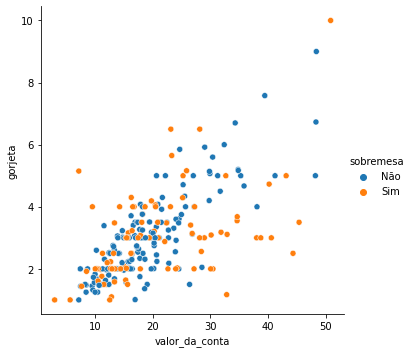

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

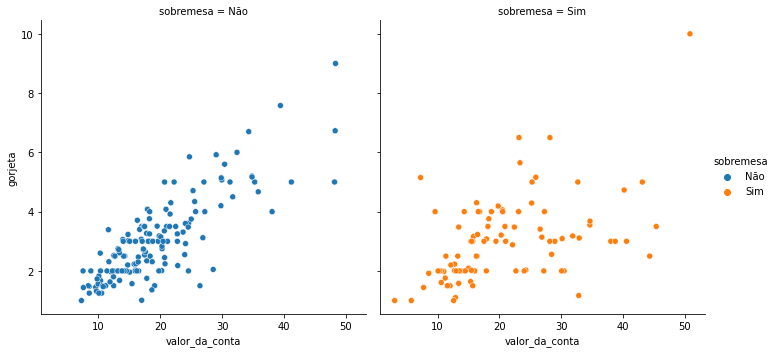

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

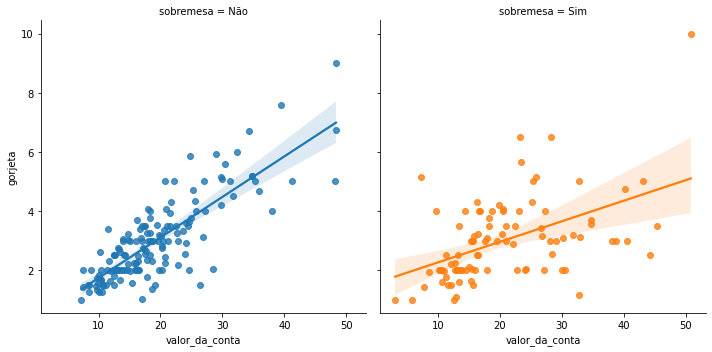

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

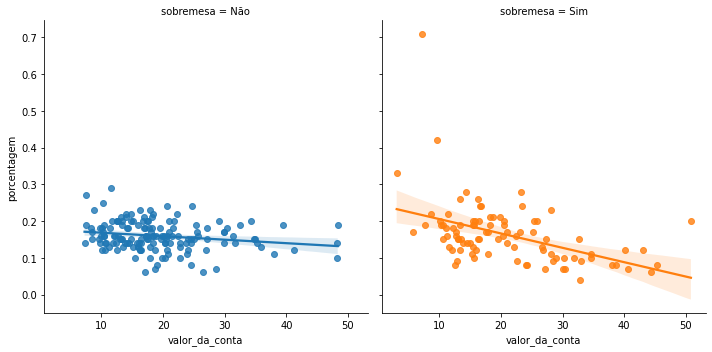

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

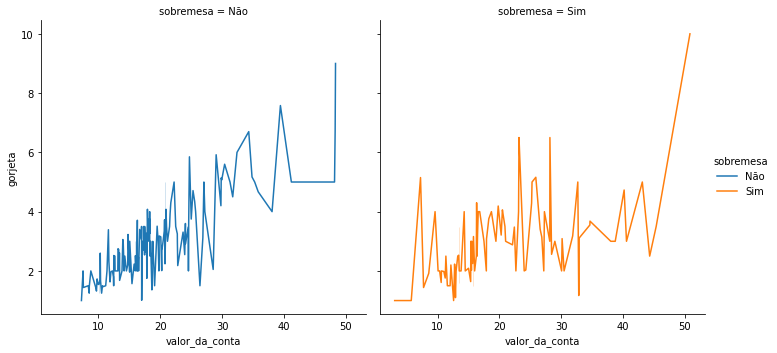

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)


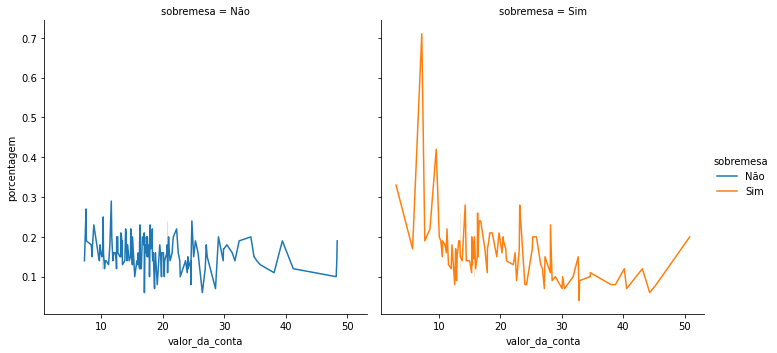

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

## Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa

# Teste de Hipótese

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
# trazendo a porcentagem da população que pedirem sobremesa
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sobremesa.head()

56    0.08
58    0.16
60    0.16
61    0.14
62    0.18
Name: porcentagem, dtype: float64

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa.head()

0    0.06
1    0.16
2    0.17
3    0.14
4    0.15
Name: porcentagem, dtype: float64

In [ ]:
# queremos o p-valor, já que o p-valor é maior que 0.05, aceitamos a Hipótese nula
# então signigifca que a população de quem come ou não sobremesa, é a mesma
r = ranksums(sobremesa, sem_sobremesa)

In [ ]:
print('O valor do p-valor é {}, então aceitamos a Hipótese nula'.format(r.pvalue.round(3)))

O valor do p-valor é 0.527, então aceitamos a Hipótese nula


# Análise 3 - Dias da semana

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

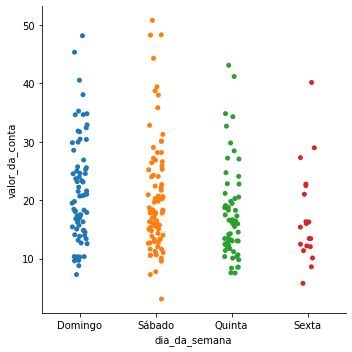

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

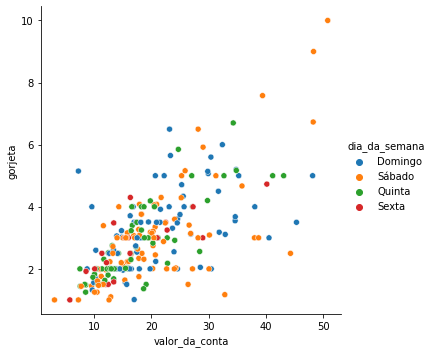

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

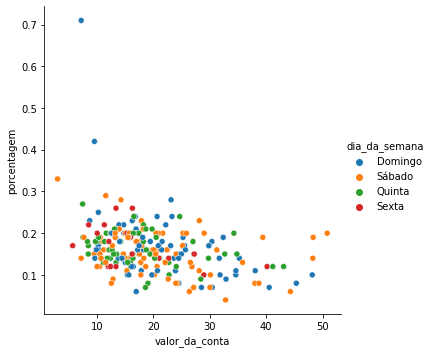

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

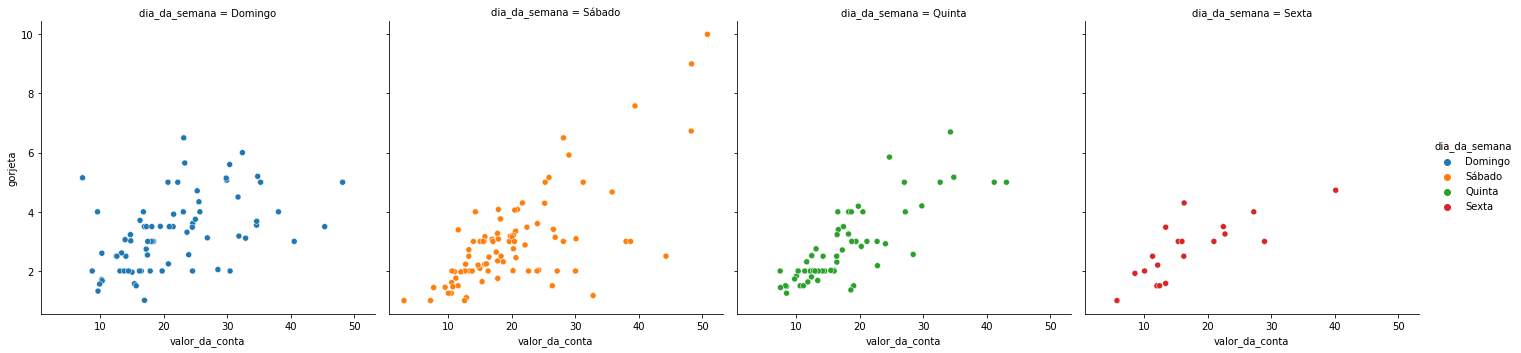

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

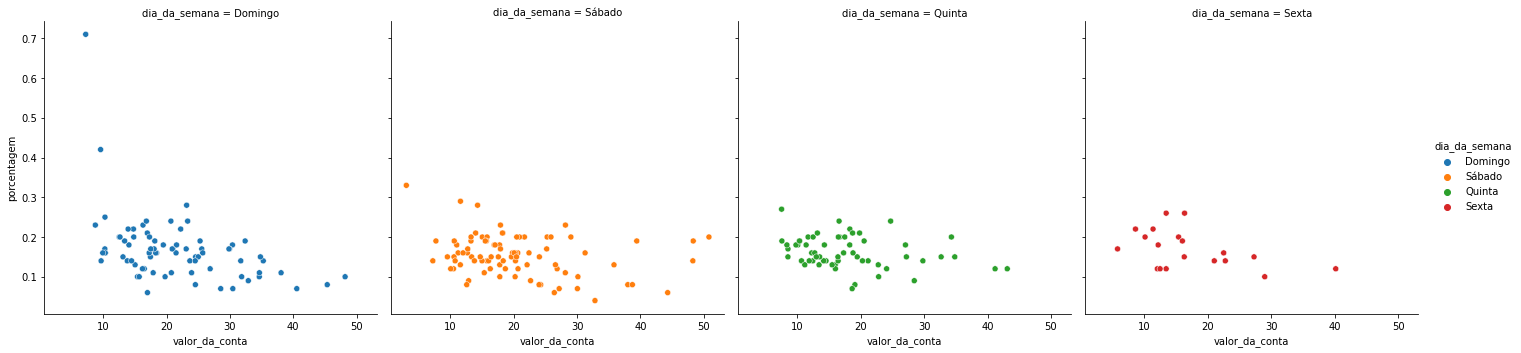

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)


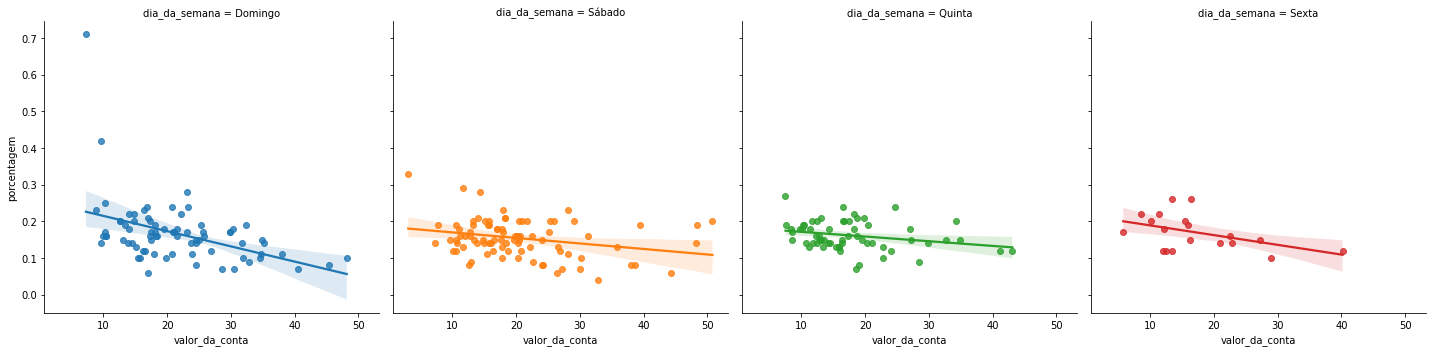

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas.round(2)))

A média geral das gorjetas é de 3.0


In [ ]:
# groupby mais uma ação, então você agrupou os registros pela caracteristica unica
# e então tirou a média, depois mostrou só as colunas que queremos ver
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [ ]:
# frequencia de pessoas em cada dia.
print('Frêquencia dos dias')
gorjetas.dia_da_semana.value_counts()
# o sabado tem mais pessoas, mas a média de gorjeta do domingo é maior
# que a do sabado. 
# Bom o valor da gorjeta são diferentes entre sabado e domingo
# será que o valor da conta entre esses dias é diferente?

Frêquencia dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

# Teste de hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [ ]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue.round(3)))
# como o p-valor é maior que 0.05, então a gente aceita o H0
# que a distribuição da conta é o mesmo que no sabado e no domingo

O valor do p-value é 0.358


# Análise 4 - Hora do dia

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

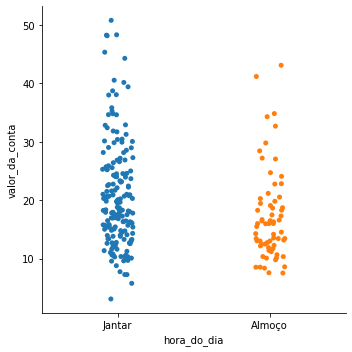

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

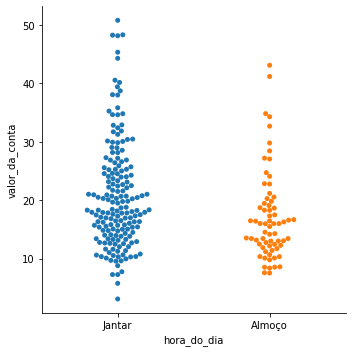

In [ ]:
# muitos pontos ficam um encima do outro, o parâmetro kind='swarm', ele separa
# esses pontos, sem alterar o seu valor
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

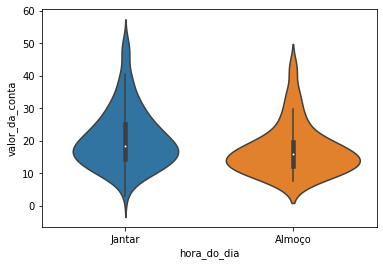

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

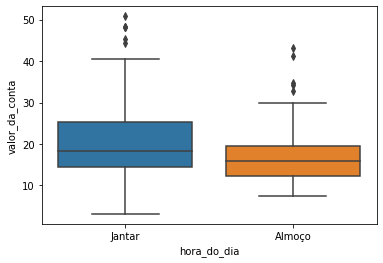

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


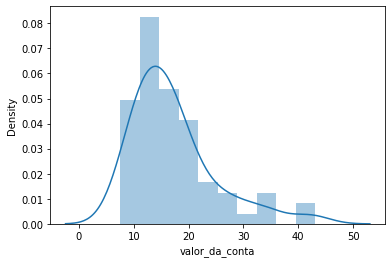

In [ ]:
sns.distplot(almoco)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


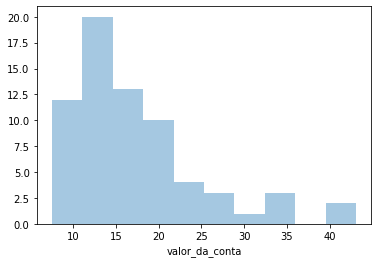

In [ ]:
sns.distplot(almoco, kde=False)

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


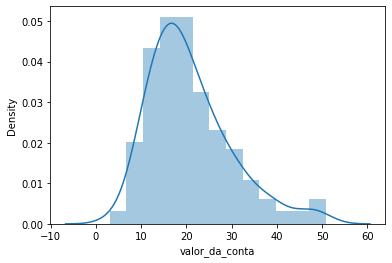

In [ ]:
sns.distplot(jantar)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


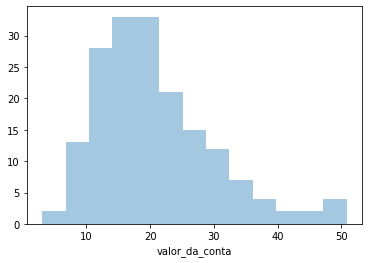

In [ ]:
sns.distplot(jantar, kde=False)

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


# Teste de Hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [ ]:
r2 = ranksums(jantar, almoco)
print('O valor do p-valor é de {}.'.format(r2.pvalue.round(3)))
# rejeitamos o H0

O valor do p-valor é de 0.001.


In [ ]:
gorjetas.query()